## Read Weather Forecast

In [39]:
import pandas as pd

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
filepath_25 = '/content/drive/MyDrive/Lumiere Program/Niharika Yalla/Data/forecast_los angeles_2023-10-25_13-58-33_hourly.csv'
filepath_26 ='/content/drive/MyDrive/Lumiere Program/Niharika Yalla/Data/forecast_los angeles_2023-10-26_07-21-17_hourly.csv'
filepath_27 = '/content/drive/MyDrive/Lumiere Program/Niharika Yalla/Data/forecast_los angeles_2023-10-27_08-41-10_hourly.csv'

df_weather_25 = pd.read_csv(filepath_25, parse_dates=['dt'])
df_weather_26 = pd.read_csv(filepath_26, parse_dates=['dt'])
df_weather_27 = pd.read_csv(filepath_27, parse_dates=['dt'])

In [42]:
df_weather_27.head()

,dt,dt_machine,timezone,timezone_offset,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,wind_gust,weather,pop
0,2023-10-27 12:00:00,1698408000,America/Los_Angeles,-25200,288.05,287.71,1016,81,284.82,0.00,2,10000,1.22,124,1.71,"[{'id': 800, 'main': 'Clear', 'description': '...",0
1,2023-10-27 13:00:00,1698411600,America/Los_Angeles,-25200,287.56,287.20,1016,82,284.53,0.00,0,10000,0.64,131,0.96,"[{'id': 800, 'main': 'Clear', 'description': '...",0
2,2023-10-27 14:00:00,1698415200,America/Los_Angeles,-25200,287.99,287.64,1016,81,284.76,0.00,0,10000,0.76,134,1.21,"[{'id': 800, 'main': 'Clear', 'description': '...",0
3,2023-10-27 15:00:00,1698418800,America/Los_Angeles,-25200,288.60,288.29,1016,80,285.17,0.11,1,10000,1.08,133,1.46,"[{'id': 800, 'main': 'Clear', 'description': '...",0
4,2023-10-27 16:00:00,1698422400,America/Los_Angeles,-25200,289.67,289.39,1016,77,285.63,0.61,2,10000,1.58,138,1.75,"[{'id': 800, 'main': 'Clear', 'description': '...",0


In [43]:
# convert Kelvin to Celsius

df_weather_25.temp = df_weather_25.temp - 273.15
df_weather_26.temp = df_weather_26.temp - 273.15
df_weather_27.temp = df_weather_27.temp - 273.15

In [44]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   dt               48 non-null     datetime64[ns]
 1   dt_machine       48 non-null     int64         
 2   timezone         48 non-null     object        
 3   timezone_offset  48 non-null     int64         
 4   temp             48 non-null     float64       
 5   feels_like       48 non-null     float64       
 6   pressure         48 non-null     int64         
 7   humidity         48 non-null     int64         
 8   dew_point        48 non-null     float64       
 9   uvi              48 non-null     float64       
 10  clouds           48 non-null     int64         
 11  visibility       48 non-null     int64         
 12  wind_speed       48 non-null     float64       
 13  wind_deg         48 non-null     int64         
 14  wind_gust        48 non-null     float64    

## Plot temperature vs time

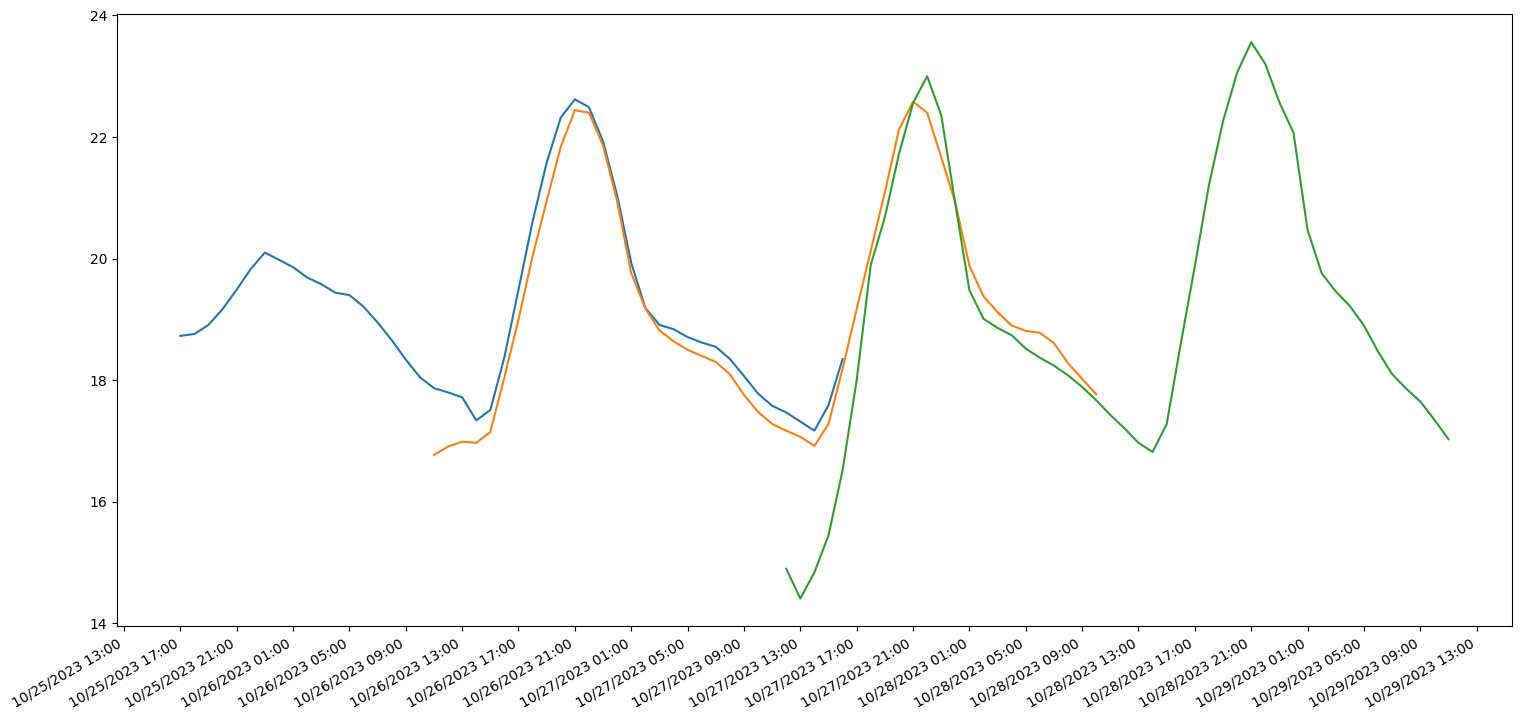

In [46]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(18,9))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval = 4))

plt.plot(df_weather_25.dt, df_weather_25.temp)
plt.plot(df_weather_26.dt, df_weather_26.temp)
plt.plot(df_weather_27.dt, df_weather_27.temp)
plt.gcf().autofmt_xdate()

#google how to add titles and axis labels in matplotlib python
# save the plot in Gdrive using Python
#plt.savefig()

## Combine the temperature of the 3 files

In [ ]:
#keeping only the temperature of the 3 files
df_temp_25 = df_weather_25[['dt', 'temp']].copy()
df_temp_26 = df_weather_26[['dt', 'temp']].copy()
df_temp_27 = df_weather_27[['dt', 'temp']].copy()

In [ ]:
df_temp_25.rename(columns={"temp": "temp_25"}, inplace=True)
df_temp_26.rename(columns={"temp": "temp_26"}, inplace=True)
df_temp_27.rename(columns={"temp": "temp_27"}, inplace=True)

df_temp = pd.merge(df_temp_25, df_temp_26, on=['dt'], how='outer')
df_temp = pd.merge(df_temp, df_temp_27, on=['dt'], how='outer')
df_temp

,dt,temp_25,temp_26,temp_27
0,2023-10-25 17:00:00,18.73,NaN,NaN
1,2023-10-25 18:00:00,18.76,NaN,NaN
2,2023-10-25 19:00:00,18.91,NaN,NaN
3,2023-10-25 20:00:00,19.17,NaN,NaN
4,2023-10-25 21:00:00,19.49,NaN,NaN
...,...,...,...,...
86,2023-10-29 07:00:00,NaN,NaN,18.10
87,2023-10-29 08:00:00,NaN,NaN,17.86
88,2023-10-29 09:00:00,NaN,NaN,17.65
89,2023-10-29 10:00:00,NaN,NaN,17.35


In [ ]:
#Calculating the errors
df_temp['error_25_26'] = df_temp.temp_25 - df_temp.temp_26
df_temp['error_26_27'] = df_temp.temp_26 - df_temp.temp_27
df_temp['error_25_27'] = df_temp.temp_25 - df_temp.temp_27


In [ ]:
#Descriptive Statistics of the data
df_temp.describe()

,temp_25,temp_26,temp_27,error_25_26,error_26_27,error_25_27
count,48.000000,48.000000,48.000000,30.000000,23.000000,5.000000
mean,19.110000,19.141667,19.093542,0.332000,0.615652,2.356000
std,1.394749,1.777302,2.349057,0.246134,0.889534,0.411315
min,17.170000,16.770000,14.410000,0.010000,-0.690000,1.830000
25%,18.065000,17.767500,17.595000,0.185000,0.145000,2.140000
50%,18.875000,18.795000,18.670000,0.275000,0.370000,2.330000
75%,19.725000,20.327500,20.735000,0.367500,0.790000,2.570000
max,22.620000,22.580000,23.560000,1.100000,2.660000,2.910000


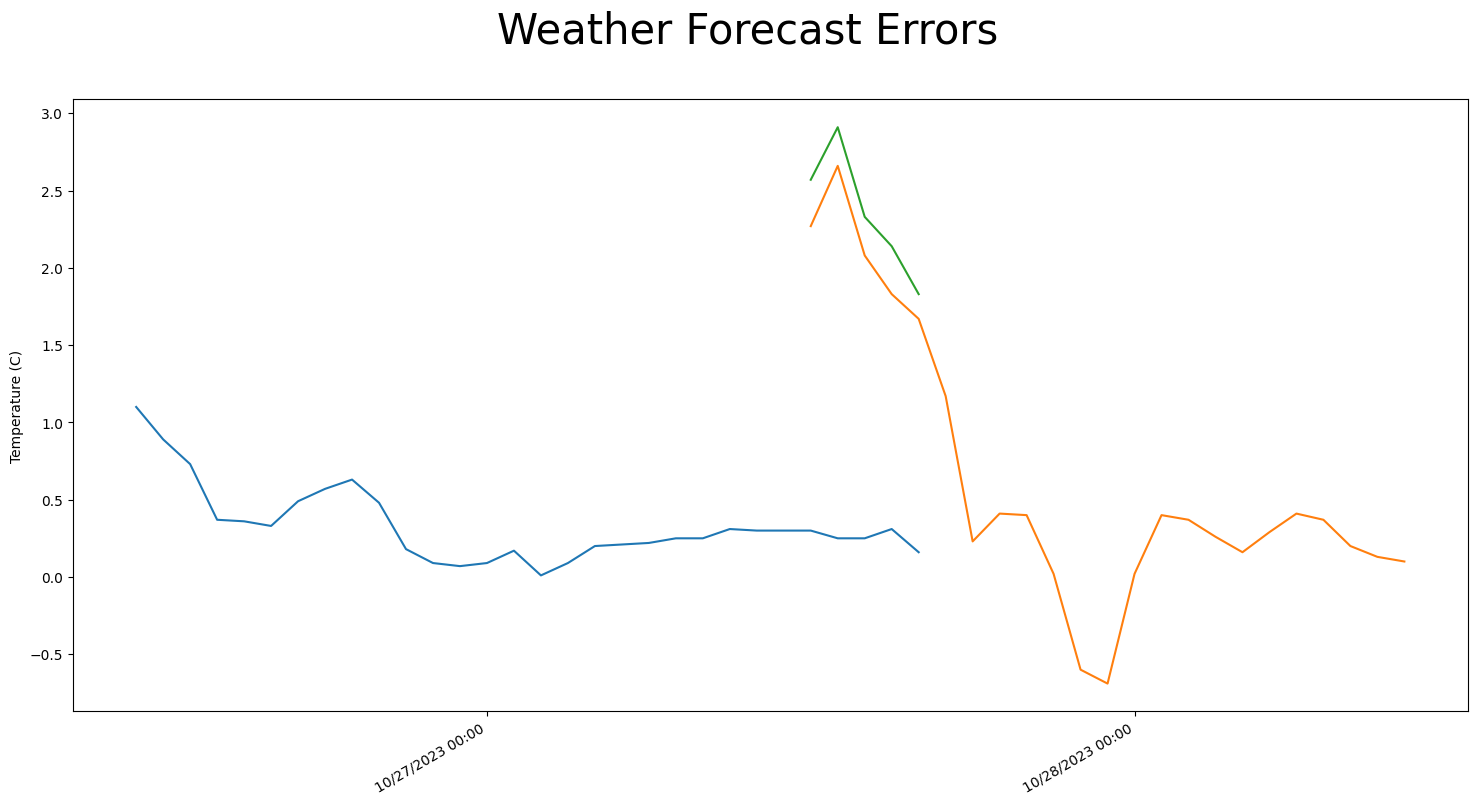

In [ ]:
# plotting the errors
plt.figure(figsize=(18,9))
plt.suptitle("Weather Forecast Errors", size=30)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.plot(df_temp.dt, df_temp.error_25_26)
plt.plot(df_temp.dt, df_temp.error_26_27)
plt.plot(df_temp.dt, df_temp.error_25_27)

plt.ylabel("Temperature (C)")

#plt.axhline(x = 0, ymin = 0, ymax = 1, color="red", linestyle = "dashed") # Top of the plot
plt.gcf().autofmt_xdate()

In [ ]:
#Save results as csv file
df_temp.to_csv('/content/drive/MyDrive/Lumiere Program/Niharika Yalla/Data/forecast_errors_25to27.csv')